In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## **Parameters**

**System parameters**

In [ ]:
w1 = 20*2*pi
w2 = 30*2*pi
w3 = 50*2*pi
omega = np.diag([w1,w2,w3])
omega2 = omega**2

In [ ]:
PHI=np.array([[0.125, 1.35, 5.13, 5.34],
             [-0.575, -3.86, 3.80, 4.67],
             [1.330, 3.21, 2.86, 4.41]])
PHI_nl=PHI[:,3]
PHI=PHI[:,:3]

Nonlinearity

In [ ]:
a_nl = 10
f_nl = lambda x : a_nl*x**3
f_nl = np.vectorize(f_nl)

Damping
$\delta=2*damping.ratio*\omega$

In [ ]:
dampingcoeff= 0.01
delta = 2*dampingcoeff*omega

Initial conditions

In [ ]:
Q0=np.array([[0,0],
            [0,0],
            [0,0]])
X0=np.matmul(PHI,Q0)

Excitation, Graphs & Simulation

In [ ]:
Tsimul = 100
f0=10
fend=70
v=(fend-f0)/Tsimul
F=10000
Pq = F*PHI[:,0]
excitation = lambda t:  Pq*cos(2*pi*(f0+v/2*t)*t)

In [ ]:
fs=10*fend
Npoint = Tsimul*fs
FREQ=np.linspace(f0,fend, Npoint+1)

In [ ]:
fs

700

# **Beam equations**


$\ddot{q}+\omega^{2}q+\Phi^{T}f_{nl}(\Phi_{tip}q) + \delta \dot{q} = excitation(t)$\    
$x=\Phi q$

In [ ]:
def qres(Q,t):
  q=Q[:,0]
  driv=Q[:,1]
  fnl=np.matmul(PHI_nl,q)
  fnl=np.array([f_nl(fnl)]*3)
  #print(fnl)
  ddriv = -np.matmul(omega2,q) -np.matmul(PHI.T,fnl)+excitation(t)-np.matmul(delta,driv)
  dQ=np.zeros((3,2))
  dQ[:,0]=driv
  dQ[:,1]=ddriv
  return dQ

#**Solve ODE** Runge Kutta

In [ ]:
def rk4(f,t0,x0,tn,n):
    # Calculating step size
    h = (tn-t0)/n
    X=[x0]
    for i in range(n):
        k1 = np.multiply(h,(f(t0, x0)))
        k2 = np.multiply(h, (f((t0+h/2), (x0+k1/2))))
        k3 = np.multiply(h, (f((t0+h/2), (x0+k2/2))))
        k4 = np.multiply(h, (f((t0+h), (x0+k3))))
        k = (k1+2*k2+2*k3+k4)/6
        xn = x0 + k
        
        x0 = xn
        t0 = t0+h
        X.append(xn)
    
    return X



# **Graphiques**

In [ ]:
def create_signal(tfin,Npoint):
  T = np.linspace(0,tfin,Npoint+1)
  f = lambda t, Q : qres(Q, t)
  Q=rk4(f,0,Q0,tfin,Npoint)
  X=np.matmul(PHI,Q)
  return (T,X,Q)



In [ ]:
(T,X,Q)=create_signal(Tsimul,Npoint)
X1=(np.array(X).T)[0,0]
X2=(np.array(X).T)[0,1]
X3=(np.array(X).T)[0,2]

Q1=(np.array(Q).T)[0,0]
Q2=(np.array(Q).T)[0,1]
Q3=(np.array(Q).T)[0,2]


Text(0.5, 0.98, 'Q=f(freq)')

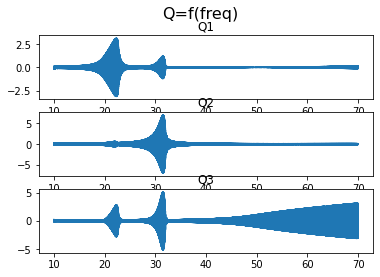

In [ ]:
fig,ax=plt.subplots(3)
ax[0].plot(FREQ,Q1)
ax[1].plot(FREQ,Q2)
ax[2].plot(FREQ,Q3)
ax[0].set_title('Q1')
ax[1].set_title('Q2')
ax[2].set_title('Q3')
fig.suptitle('Q=f(freq)', fontsize=16)

Text(0.5, 0.98, 'X=f(freq)')

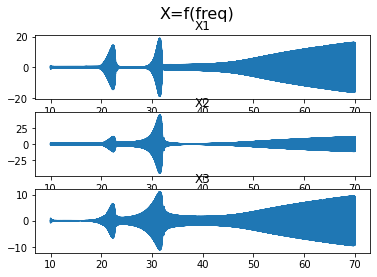

In [ ]:
fig,ax=plt.subplots(3)
ax[0].plot(FREQ,X1)
ax[1].plot(FREQ,X2)
ax[2].plot(FREQ,X3)
ax[0].set_title('X1')
ax[1].set_title('X2')
ax[2].set_title('X3')
fig.suptitle('X=f(freq)', fontsize=16)

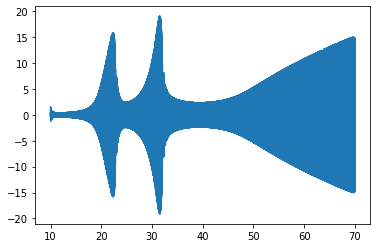

In [ ]:
X_nl=np.matmul(PHI_nl,Q)[:,0]
plt.plot(FREQ,X_nl)

In [ ]:
from google.colab import files
X3.tofile('beam.csv', sep = ',')
files.download('beam.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Wavelet transform**

In [ ]:
import pywt

In [ ]:
''' Choosing scales '''
desiredfreq = np.linspace(f0,fend,100)

scale=lambda f : 0.8125*fs/f
SCALE = np.vectorize(scale)
sampling_period = 1/fs
scales=SCALE(desiredfreq)

'''' Other pararmeters '''
wavelet="morl"
sampling_period = 1/fs
ABS=np.vectorize(abs)